In [1]:
import pandas as pd
import numpy as np
import pickle

### covid data aggregation

In [2]:
# import raw data
covid = pd.read_csv('./data/WHO-COVID-19-global-data.csv')
covid.drop(columns=['Country_code','WHO_region'], inplace=True)
covid = covid[covid['Date_reported']<'2020-08-01']
covid.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0
2,2020-01-05,Afghanistan,0,0,0,0
3,2020-01-06,Afghanistan,0,0,0,0
4,2020-01-07,Afghanistan,0,0,0,0


In [3]:
# use the weighted average as stated in the paper, pay attention to the country name in the origin data
English_country = ['United States of America','The United Kingdom','Canada','Australia','South Africa','Ireland','New Zealand']
English_dict={'United States of America':0.689,'The United Kingdom':0.161,'Canada':0.058,\
              'Australia':0.054,'South Africa':0.015, 'Ireland':0.012,'New Zealand':0.011}
French_country = ['France','Canada','Cameroon','Belgium','Senegal','Benin','Switzerland']
French_dict = {'France':0.629,'Canada':0.101,'Cameroon':0.092,'Belgium':0.079,'Senegal':0.043,\
               'Benin':0.038,'Switzerland':0.018}
German_country = ['Germany','Austria','Switzerland']
German_dict = {'Germany':0.87,'Austria':0.087,'Switzerland':0.063}

<AxesSubplot:>

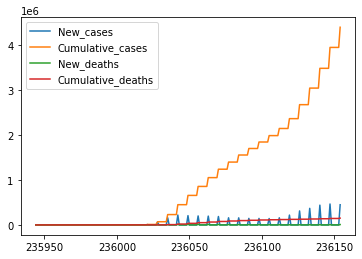

In [4]:
# US data is weird( only weekly data is provided), need further adjustment
covid[covid['Country'] == 'United States of America'].plot()

In [5]:
def weight_sum(df, language):
    res = np.zeros(4) # seven columns that we care
    if language=='English':
        for _, row in df.iterrows():
            weight = English_dict[row['Country']]
            res += weight*row[2:]
        
    elif language=='French':
        for _, row in df.iterrows():
            weight = French_dict[row['Country']]
            res += weight*row[2:]
        
    elif language=='German':
        for _, row in df.iterrows():
            weight = German_dict[row['Country']]
            res += weight*row[2:]
    else:
        print('Invalid language')
        return
    
    return res

In [6]:
# covid data integration
English = covid[covid['Country'].isin(English_country)].groupby('Date_reported').apply(weight_sum, language='English')
French = covid[covid['Country'].isin(French_country)].groupby('Date_reported').apply(weight_sum, language='French')
German = covid[covid['Country'].isin(German_country)].groupby('Date_reported').apply(weight_sum, language='German')
Japanese = covid[covid['Country'] == 'Japan'].set_index('Date_reported').drop(columns=['Country'])
Italian = covid[covid['Country'] == 'Italy'].set_index('Date_reported').drop(columns=['Country'])
Dutch = covid[covid['Country'] == 'Netherlands'].set_index('Date_reported').drop(columns=['Country'])
Swedish = covid[covid['Country'] == 'Sweden'].set_index('Date_reported').drop(columns=['Country'])
Korean = covid[covid['Country'] == 'Republic of Korea'].set_index('Date_reported').drop(columns=['Country'])
Finnish = covid[covid['Country'] == 'Finland'].set_index('Date_reported').drop(columns=['Country'])
Norwegian = covid[covid['Country'] == 'Norway'].set_index('Date_reported').drop(columns=['Country'])
Danish = covid[covid['Country'] == 'Denmark'].set_index('Date_reported').drop(columns=['Country'])
Serbian = covid[covid['Country'] == 'Serbia'].set_index('Date_reported').drop(columns=['Country'])

In [7]:
# save as a pickle file
covid_agg = {"en":English, "fr":French, "de":German, "ja":Japanese, "it":Italian, "nl":Dutch, "ko":Korean,\
            "no":Norwegian, "fi":Finnish, "sv": Swedish, "sr":Serbian, "da":Danish}
with open('./data/covid_agg_who.pickle', 'wb') as handle:
    pickle.dump(covid_agg, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Google mobility data aggregation

In [8]:
# Also need to do data integration for mobility
google_mobility = pd.read_csv('./data/Global_Mobility_Report.csv')
google_mobility.set_index('date', inplace=True)
google_mobility = google_mobility[google_mobility['sub_region_1'].isna()]
google_mobility.head()

C:\Users\jchen\AppData\Local\Temp\ipykernel_44068\2133238311.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  google_mobility = pd.read_csv('./data/Global_Mobility_Report.csv')


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,
2020-02-15,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,0.0,4.0,5.0,0.0,2.0,1.0
2020-02-16,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,1.0,4.0,4.0,1.0,2.0,1.0
2020-02-17,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,5.0,1.0,2.0,1.0
2020-02-18,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,-2.0,1.0,5.0,0.0,2.0,1.0
2020-02-19,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,-2.0,0.0,4.0,-1.0,2.0,1.0


In [9]:
English_country = ['United States','United Kingdom','Canada','Australia','South Africa','Ireland','New Zealand']
English_dict={'United States':0.689,'United Kingdom':0.161,'Canada':0.058,\
              'Australia':0.054,'South Africa':0.015, 'Ireland':0.012,'New Zealand':0.011}
French_country = ['France','Canada','Cameroon','Belgium','Senegal','Benin','Switzerland']
French_dict = {'France':0.629,'Canada':0.101,'Cameroon':0.092,'Belgium':0.079,'Senegal':0.043,\
               'Benin':0.038,'Switzerland':0.018}
German_country = ['Germany','Austria','Switzerland']
German_dict = {'Germany':0.87,'Austria':0.087,'Switzerland':0.063}

In [10]:
def weight_sum_mob(df, language):
    res = np.zeros(6) # seven columns that we care
    if language=='English':
        for _, row in df.iterrows():
            weight = English_dict[row['country_region']]
            res += weight*row[7:]
        
    elif language=='French':
        for _, row in df.iterrows():
            weight = French_dict[row['country_region']]
            res += weight*row[7:]
        
    elif language=='German':
        for _, row in df.iterrows():
            weight = German_dict[row['country_region']]
            res += weight*row[7:]
    else:
        print('Invalid language')
        return
    
    return res

In [11]:
# data integration
English = google_mobility[google_mobility['country_region'].isin(English_country)].groupby('date').apply(weight_sum_mob, language='English')
French = google_mobility[google_mobility['country_region'].isin(French_country)].groupby('date').apply(weight_sum_mob, language='French')
German = google_mobility[google_mobility['country_region'].isin(German_country)].groupby('date').apply(weight_sum_mob, language='German')
Japanese = google_mobility[google_mobility['country_region'] == 'Japan'].iloc[:,7:]
Italian = google_mobility[google_mobility['country_region'] == 'Italy'].iloc[:,7:]
Dutch = google_mobility[google_mobility['country_region'] == 'Netherlands'].iloc[:,7:]
Swedish = google_mobility[google_mobility['country_region'] == 'Sweden'].iloc[:,7:]
Korean = google_mobility[google_mobility['country_region'] == 'South Korea'].iloc[:,7:]
Finnish = google_mobility[google_mobility['country_region'] == 'Finland'].iloc[:,7:]
Norwegian = google_mobility[google_mobility['country_region'] == 'Norway'].iloc[:,7:]
Danish = google_mobility[google_mobility['country_region'] == 'Denmark'].iloc[:,7:]
Serbian = google_mobility[google_mobility['country_region'] == 'Serbia'].iloc[:,7:]

In [12]:
# save as a pickle file
mobility_agg = {"en":English, "fr":French, "de":German, "ja":Japanese, "it":Italian, "nl":Dutch, "ko":Korean,\
            "no":Norwegian, "fi":Finnish, "sv": Swedish, "sr":Serbian, "da":Danish}
with open('./data/mobility_agg.pickle', 'wb') as handle:
    pickle.dump(mobility_agg, handle, protocol=pickle.HIGHEST_PROTOCOL)